## analiza modeli boost

```
xgb = XGBClassifier(random_state=random_state)
cat = CatBoostClassifier(random_state=random_state)
lgb = LGBMClassifier(random_state=random_state)
```

In [7]:
%load_ext autoreload
%autoreload 2
random_state = 42
import sys
sys.path.append("..")
import scripts.data_utils as dutils

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('../data_for_modeling/dataset_sample_30_percent.csv')
data.head()

,text,fake
0,"A video showing a smokenado, a tornado-shaped ...",0
1,Photograph shows a breast rash caused by South...,1
2,Pfizer CEO is still not vaccinated,1
3,Steven Seagal receives Russian citizenship on ...,0
4,Mitt Romney drove to Canada with the family do...,0


In [3]:
# wybrany wczesniej vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=7, max_df=0.7)

In [8]:
xgb = XGBClassifier(random_state=random_state)
cat = CatBoostClassifier(random_state=random_state)
lgb = LGBMClassifier(random_state=random_state)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state, stratify=data['fake'])

vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## szukamy hiperparametrów

#### LGB

In [10]:
params_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50]
}

# GridSearchCV
grid_lgb = GridSearchCV(lgb, params_lgbm, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_lgb.fit(X_train_vec, y_train)

# Wyniki
print(f"Najlepsze parametry: {grid_lgb.best_params_}")
print(f"Najlepszy F1-score (walidacja krzyżowa): {grid_lgb.best_score_:.4f}")

# Ocena na zbiorze testowym
y_pred_lgb = grid_lgb.predict(X_test_vec)
print("\nRaport klasyfikacji na zbiorze testowym:")
print(classification_report(y_test, y_pred_lgb))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Info] Number of positive: 5177, number of negative: 5192
[LightGBM] [Info] Number of positive: 5176, number of negative: 5193
[LightGBM] [Info] Number of positive: 5176, number of negative: 5193[LightGBM] [Info] Number of positive: 5177, number of negative: 5192

[LightGBM] [Info] Number of positive: 5177, number of negative: 5192
[LightGBM] [Info] Number of positive: 5177, number of negative: 5193[LightGBM] [Info] Number of positive: 5176, number of negative: 5193

[LightGBM] [Info] Number of positive: 5177, number of negative: 5193
[LightGBM] [Info] Number of positive: 5177, number of negative: 5193
[LightGBM] [Info] Number of positive: 5176, number of negative: 5193
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.205945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195170
[LightGBM] [Info] Number of data points in the trai

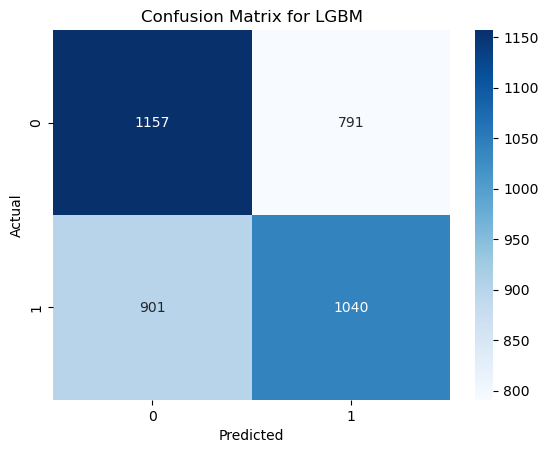

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LGBM')
plt.show()

In [20]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")

Accuracy: 0.5649
Precision: 0.5680


#### XGBoost

In [13]:
params_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(xgb, params_xgb, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_xgb.fit(X_train_vec, y_train)

print("\n--- Wyniki dla XGBoost ---")
print(f"Najlepsze parametry: {grid_xgb.best_params_}")
print(f"Najlepszy F1-score (walidacja krzyżowa): {grid_xgb.best_score_:.4f}")

y_pred_xgb = grid_xgb.predict(X_test_vec)
print("\nRaport klasyfikacji na zbiorze testowym:")
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   4.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   4.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   4.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   9.0s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   9.3s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   9.4s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   9.7s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=  14.1s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=  14.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=  14.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=  10.0s
[CV] END ..learning_rate=0.05, max_depth=5, n_es

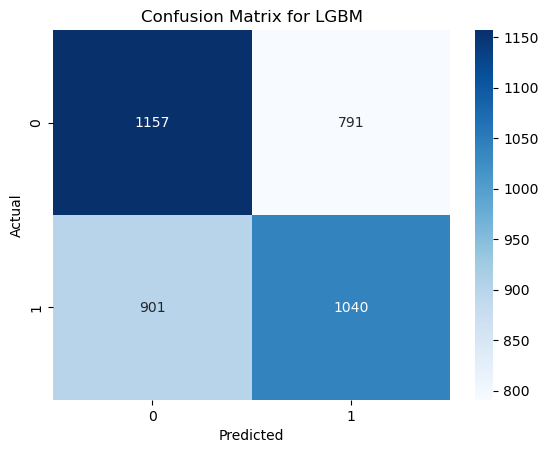

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LGBM')
plt.show()

In [21]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")

Accuracy: 0.5930
Precision: 0.6084


#### CatBoost

In [17]:
params_cat = {
    'iterations': [200, 500],
    'learning_rate': [0.05, 0.1],
    'depth': [3, 6]
}

grid_cat = GridSearchCV(cat, params_cat, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_cat.fit(X_train_vec, y_train)

print(f"Najlepsze parametry: {grid_cat.best_params_}")
print(f"Najlepszy F1-score (walidacja krzyżowa): {grid_cat.best_score_:.4f}")

y_pred_cat = grid_cat.predict(X_test_vec)
print("\nRaport klasyfikacji na zbiorze testowym:")
print(classification_report(y_test, y_pred_cat))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0:	learn: 0.6879550	total: 183ms	remaining: 36.3s
0:	learn: 0.6904542	total: 220ms	remaining: 43.7s
0:	learn: 0.6904270	total: 219ms	remaining: 1m 49s
0:	learn: 0.6904542	total: 246ms	remaining: 2m 2s
0:	learn: 0.6903738	total: 247ms	remaining: 49.3s
0:	learn: 0.6904270	total: 247ms	remaining: 49.2s
0:	learn: 0.6881073	total: 250ms	remaining: 49.8s
0:	learn: 0.6879550	total: 249ms	remaining: 2m 4s
0:	learn: 0.6903738	total: 262ms	remaining: 2m 10s
0:	learn: 0.6880530	total: 251ms	remaining: 50s
1:	learn: 0.6882641	total: 321ms	remaining: 31.8s
1:	learn: 0.6852804	total: 320ms	remaining: 31.7s
1:	learn: 0.6884638	total: 323ms	remaining: 1m 20s
1:	learn: 0.6888805	total: 331ms	remaining: 32.7s
1:	learn: 0.6884638	total: 355ms	remaining: 35.1s
1:	learn: 0.6846296	total: 359ms	remaining: 35.6s
1:	learn: 0.6852804	total: 361ms	remaining: 1m 29s
1:	learn: 0.6882641	total: 371ms	remaining: 1m 32s
1:	learn: 0.6888805	total: 387ms	rema

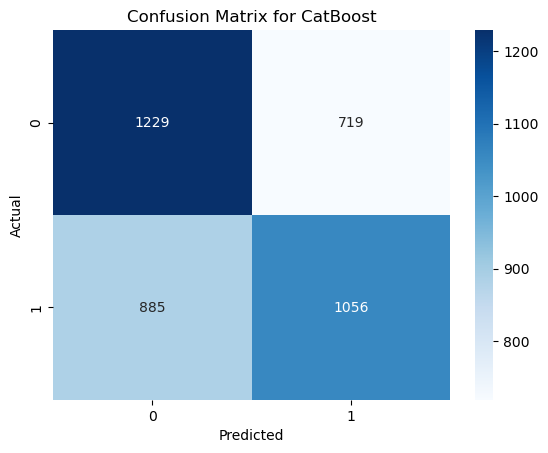

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CatBoost')
plt.show()

In [23]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cat):.4f}")

Accuracy: 0.5876
Precision: 0.5949
